In [22]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('max_rows',None)
pd.set_option('max_columns',None) 
pd.options.display.float_format = '{:,.0f}'.format

##  read and process the data

In [23]:
current_directory = Path.cwd()
folder_hotmusics = current_directory/'comments_files'
folder_hotmusics

WindowsPath('C:/Users/hp/1_python_1121/comments_files')

In [24]:
folder_popcomments = os.listdir(folder_hotmusics)

In [25]:
popmusics = []
for music in folder_popcomments:
    if music.endswith('.csv'):
        popmusics.append(music)
popmusics = pd.DataFrame(popmusics, columns=['popular_music'])
print(popmusics.shape)
popmusics.head()

(193, 1)


,popular_music
0,7 %.csv
1,All Falls Down.csv
2,Astronomia (Original Mix).csv
3,But U.csv
4,Can We Kiss Forever.csv


In [26]:
popcomments = pd.DataFrame([])
for i in range(len(popmusics)):
    f = open(current_directory/'comments_files'/popmusics['popular_music'][i],encoding = 'utf-8')
    temp_df = pd.read_csv(f,usecols=[1,2,4])  
    temp_df['music_name'] = popmusics['popular_music'][i].split('.')[0]
    popcomments = pd.concat([popcomments,temp_df])


# # data processing
popcomments = popcomments.reset_index()
popcomments = popcomments.drop(['index'],axis=1)
popcomments.rename(columns={'1':'pop_comments'}, inplace = True)
popcomments.rename(columns={'0':'number_likes'}, inplace = True)
print(popcomments.shape)
#popcomments.head(30)

(2895, 4)


standardization of the num_likes column

In [7]:
likes = []
for i in range(len(popcomments)):
    popcomments['number_likes'][i] = str(popcomments['number_likes'][i])
    if(popcomments['number_likes'][i][-1:] == '万'):
        likes.append(str(int(float(popcomments['number_likes'][i].split('万')[0])*10000)))
    elif(popcomments['number_likes'][i][-2:-1] == '.'):
        likes.append(str(int(float(popcomments['number_likes'][i])*10000)))
    else:
        likes.append(str(popcomments['number_likes'][i]))
        
import math
reference = []
for i in range(len(popcomments)):
    reference.append(likes[(math.floor(i/15)+1)*15-1])
                      
likes = pd.DataFrame(likes,columns=['number_likes_amed'])  
reference = pd.DataFrame(reference,columns=['number_likes_refer'])  

likes = pd.concat([likes,reference],axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
popcomments = pd.concat([popcomments,likes],axis=1)
popcomments = popcomments.drop(['number_likes'],axis=1)
popcomments['number_likes_amed'] = popcomments['number_likes_amed'].astype(int)
popcomments['number_likes_refer'] = popcomments['number_likes_refer'].astype(int)
popcomments.head(30)

,pop_comments,comments_num,music_name,number_likes_amed,number_likes_refer
0,1％的包容 1％的宠爱 1％的陪伴 1％的贴心 1％的想念 1％的理解 1％的懂你\n剩下9...,88991,7 %,160000,6715
1,我将是一个好女孩 气质出众 成绩拔尖 未来一片光明\n,88991,7 %,138000,6715
2,2020.2.14 ❤️❤️❤️\n,88991,7 %,61680,6715
3,上帝创造世界用了7天，第7日安息\n,88991,7 %,37306,6715
4,这是在说我们的数学作业只写了7%吗？\n,88991,7 %,35180,6715
5,我喜欢的人推了这首歌给我\n,88991,7 %,26098,6715
6,"""把亮度调到最小，把声音开满的女/男孩子一定爱惨了那个人。""\n",88991,7 %,16021,6715
7,就算还有7%的电，也不能阻碍我去爱你\n,88991,7 %,14924,6715
8,泡泡机自己买的，快乐也是自己找的\n,88991,7 %,14319,6715
9,SOURCEMUSIC和WU会再接再厉，制作更多用心的作品，回馈大家的支持。谢谢。\n,88991,7 %,13325,6715


## draw the frequency distribution histogram of comments' length

calculate the length of each comments

In [9]:
comments_len = []
for i in range(len(popcomments)):
    comments_len.append(len(popcomments['pop_comments'][i]))
comments_len = pd.DataFrame(comments_len,columns=['comments_len'])
popcomments = pd.concat([popcomments,comments_len],axis=1)
# print(popcomments.dtypes)
# popcomments.head(30)

draw a histogram for the distribution of comments' length 

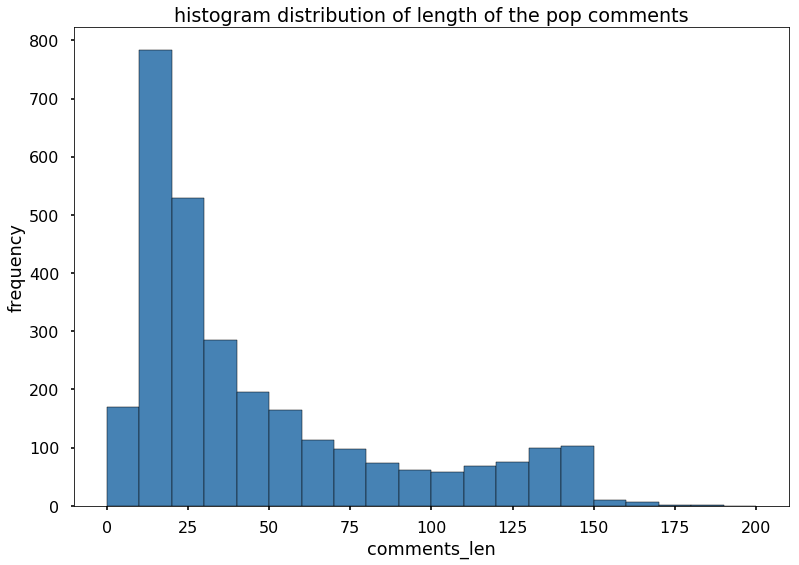

In [10]:
plt.style.use('seaborn-poster')
plt.hist(x = popcomments.comments_len, 
    bins = 20, 
    range = (0,200),
    color = 'steelblue', 
    edgecolor = 'black' 
     )
plt.xlabel('comments_len')
plt.ylabel('frequency')
plt.title('histogram distribution of length of the pop comments')
#plt.savefig('histogram distribution of length of the pop comments.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

the length of the comments concentrates at 10-40 and there is also a peak aroud 130-150 words  
**Possible Insights：** Producing longer comments can give full play of their incredible story-telling(or making?) talents

## select comments with length longer than 125 characters

In [11]:
long_comments = popcomments.loc[popcomments['comments_len']>125]
long_comments['music_name'].nunique()
long_comments.head(30)

,pop_comments,comments_num,music_name,number_likes_amed,number_likes_refer,comments_len
13,首先谢谢大家对歌曲的喜爱和对XMASwu的支持，我是歌曲BEAT的作者，源力音乐SOURCE...,88991,7 %,7275,6715,168
16,"Alan Walker🇳🇴携新单All Falls Down在Mer Musikk发行,风格...",140165,All Falls Down,146000,7588,183
20,无疑Alan Walker是北欧的电音奇才，我无法想象他在17岁前经历了什么有了哪些感悟引发...,140165,All Falls Down,80607,7588,137
28,Alan Walker 联手女歌手Noah Cyrus，男歌手Digital Farm An...,140165,All Falls Down,8405,7588,166
45,Hey，半年好久，但深刻烙在我心里。我夜晚经常在宿舍阳台一发呆就是几个小时，想着那么多曾经触...,48727,But U,115000,3392,138
57,姐姐，喜欢乃万这件事真的好幸福，这份爱从来不是单向的，姐姐说“每当你说乃万i love yo...,48727,But U,3734,3392,127
76,开始伴着哼唱的旋律，带着一种吸引，虽然歌词中唱着Yelling at the sky（仰天长...,74019,Dancing With Your Ghost,223,3951,133
82,其实我偷偷存了你发的每一张照片，每一个视频，保存了每一句语音。我关注了你的各种社交软件ID，...,74019,Dancing With Your Ghost,20026,3951,142
89,亲爱的Godfrey\n你所有的行李都收拾好了吗？明天就要远游了，这一走就是28年，走的时候...,74019,Dancing With Your Ghost,3951,3951,130
101,是一个男孩子最爱听的歌 那天下午，烈日炎炎，我们在亲吻缠绵后，你坐在窗户边靠着椅子放着这首歌...,75774,DEAR JOHN,5328,3971,141


**Possible Insight**：hard to tell by the machine, but with more comments relating a story or making a confession

## regression between the thumbs up number and comments' length

In [12]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

standardization of the variable named num_likes_amed

In [13]:
popcomments_copy = popcomments
popcomments_copy['number_likes_amed'] = popcomments_copy['number_likes_amed'].astype(float)
popcomments_copy['number_likes_refer'] = popcomments_copy['number_likes_refer'].astype(float)
popcomments_copy['comments_num'] = popcomments_copy['comments_num'].astype(float)
popcomments_copy['number_likes_stand']= round(popcomments_copy['number_likes_amed']/popcomments_copy['number_likes_refer'],3)
# print(popcomments_copy.dtypes)
# popcomments_copy.head(15)

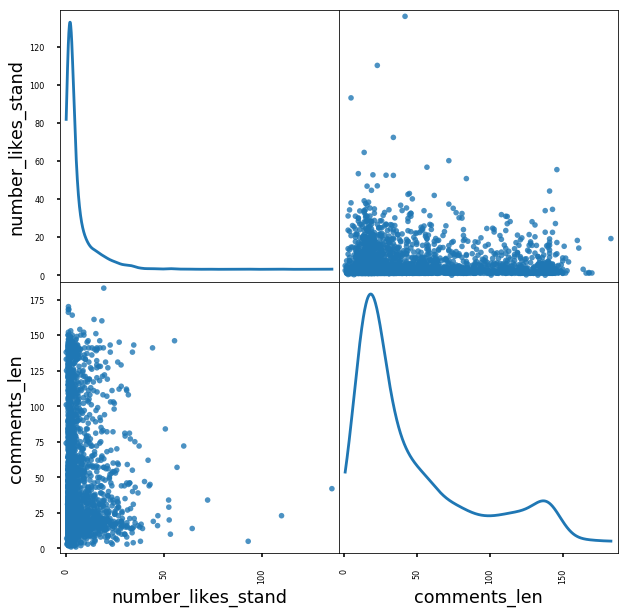

In [14]:
scatter_matrix(
    popcomments_copy[['number_likes_stand','comments_len']],
    alpha = 0.8,figsize =(10,10),diagonal = 'kde'
)
#plt.savefig('scatter_matrix.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

In [15]:
x = popcomments_copy['comments_len']
y = popcomments_copy['number_likes_stand']

In [16]:
reg = sm.OLS(y, x).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:     number_likes_stand   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     641.7
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          4.83e-128
Time:                        18:22:38   Log-Likelihood:                -10562.
No. Observations:                2895   AIC:                         2.113e+04
Df Residuals:                    2894   BIC:                         2.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
comments_len     0.0716      0.003     25.332   

不能说完全一致 只能说是毫不相关:)

## draw the frequency distribution histogram of thumbs-up to comments ratio

calculate the commentsnumber_likesforhighestcomment ratio

In [17]:
ratio = []
for i in range(len(popcomments_copy)):
    ratio.append(popcomments_copy['number_likes_amed'][math.floor(i/15)*15]/popcomments_copy['comments_num'][i])
    
ratio = pd.DataFrame(ratio, columns=['ratio'])
popcomments_copy = pd.concat([popcomments_copy,ratio],axis=1)
popcomments_copy.head()

,pop_comments,comments_num,music_name,number_likes_amed,number_likes_refer,comments_len,number_likes_stand,ratio
0,1％的包容 1％的宠爱 1％的陪伴 1％的贴心 1％的想念 1％的理解 1％的懂你\n剩下9...,"88,991",7 %,"160,000","6,715",54,24,2
1,我将是一个好女孩 气质出众 成绩拔尖 未来一片光明\n,"88,991",7 %,"138,000","6,715",26,21,2
2,2020.2.14 ❤️❤️❤️\n,"88,991",7 %,"61,680","6,715",17,9,2
3,上帝创造世界用了7天，第7日安息\n,"88,991",7 %,"37,306","6,715",17,6,2
4,这是在说我们的数学作业只写了7%吗？\n,"88,991",7 %,"35,180","6,715",19,5,2


In [18]:
ratio_music = pd.DataFrame(popcomments_copy['ratio'].unique(),columns=['ratio_music'])
name_music = pd.DataFrame(popcomments_copy['music_name'].unique(),columns=['name_music'])
comnum_likes_ratio = pd.concat([name_music,ratio_music],axis=1)
comnum_likes_ratio.head(15)

,name_music,ratio_music
0,7 %,2
1,All Falls Down,2
2,Astronomia (Original Mix),1
3,But U,2
4,Can We Kiss Forever,1
5,Dancing With Your Ghost,1
6,DEAR JOHN,2
7,Fractures,3
8,Hey KONG,3
9,I don't wanna see u anymore,4


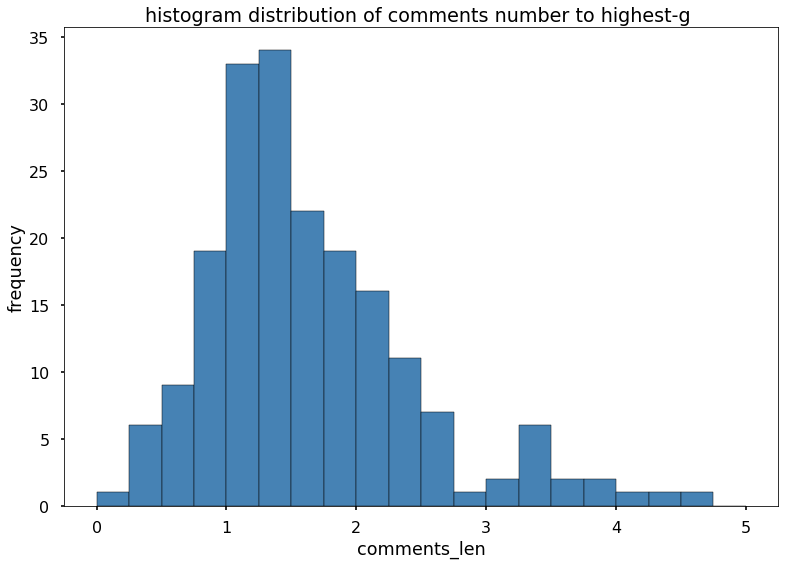

In [20]:
plt.hist(x = comnum_likes_ratio.ratio_music, 
    bins = 20, 
    range = (0,5),
    color = 'steelblue', 
    edgecolor = 'black' 
     )
plt.xlabel('comments_len')
plt.ylabel('frequency')
plt.title('histogram distribution of comments number to highest-g ')
#plt.savefig('histogram distribution of comments number to highest-g.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

select the musics with ratio mentioned above larger than 3

In [21]:
comnum_likes_ratio.loc[comnum_likes_ratio['ratio_music']>3]

,name_music,ratio_music
9,I don't wanna see u anymore,4
70,吹梦到西洲,3
71,吹灭小山河,5
75,囍（Chinese Wedding）,3
79,处处吻,3
84,大天蓬 (女生版),4
86,大鱼,4
100,年少有为,4
107,悬溺,4
119,我的名字,3


the first 5 musics covers 4 of hot background music(bgm) from DOUYIN.   
**Possible insights**: Netease Cloud users are more willing to participate in community construction. People from DOUYIN(other application) won't bother to spend time on writing comments.